In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500) ## show more columns

# Analysis of Twibot-20 dataset
This section is used to analyze the Twibot-20 dataset (https://arxiv.org/abs/2106.13088)

## Load the train and test datasets

In [3]:
from datasets import load_twibot20

twibot20_train = load_twibot20(dataset='train')
twibot20_test = load_twibot20(dataset='test')

## Analyse the datatests

In [4]:
twibot20_train.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,8.278000e+03,8.278000e+03,8278.000000,8278.000000,8.278000e+03,8278.000000
mean,6.464586e+05,6.609915e+03,1504.488524,13297.475477,2.158684e+04,0.561247
std,4.148888e+06,6.377857e+04,9855.072510,40415.682739,9.008918e+04,0.496265
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,2.010000e+02,2.310000e+02,0.000000,146.000000,4.050000e+02,0.000000
50%,1.939500e+03,7.230000e+02,13.000000,1584.500000,3.624000e+03,1.000000
75%,3.762050e+04,2.124000e+03,258.000000,9121.250000,1.572975e+04,1.000000
max,1.124032e+08,4.339982e+06,550181.000000,783456.000000,5.140025e+06,1.000000


In [5]:
twibot20_test.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,1.183000e+03,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,8.231450e+05,6449.619611,1864.894336,12514.628064,21437.875740,0.540997
std,5.577725e+06,40365.824629,9400.150853,29729.397790,57544.176485,0.498527
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.145000e+02,234.500000,1.000000,159.500000,381.000000,0.000000
50%,2.574000e+03,748.000000,17.000000,1884.000000,4051.000000,1.000000
75%,4.764750e+04,2051.500000,331.500000,10001.000000,19556.000000,1.000000
max,8.731376e+07,804528.000000,118656.000000,322238.000000,859809.000000,1.000000


Although the train and test datasets are split into two files, we could merge them together and separate them ourselves.

The train and test datasets have 8278 and 1183 entries, respectively.

In [6]:
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   profile_location              728 non-null    object             
 4   description                   8278 non-null   object             
 5   url                           4028 non-null   object             
 6   entities                      8278 non-null   object             
 7   protected                     8278 non-null   bool               
 8   followers_count               8278 non-null   int64              
 9   friends_count                 8278 non-null   int64              
 10  listed_count             

In [7]:
twibot20_train.sample(3)

,name,screen_name,location,profile_location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_tile,profile_image_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,label,probe_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1283826196179030022,Eva Cassia Oliveira,EvaCassiaOlive1,,None,,None,{'description': {'urls': []}},False,3,339,0,2020-07-16 18:10:10+00:00,55,None,None,False,False,1,None,False,False,False,F5F8FA,None,False,http://pbs.twimg.com/profile_images/1283827076...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,1,2020-09-06 00:00:00+00:00
1155497725686886400,Seán Ó Colmáin,Sean45113414,"Kilkenny, Ireland","{'id': '83e9c5185856cabc', 'url': 'https://api...",,None,{'description': {'urls': []}},False,84,147,0,2019-07-28 15:18:20+00:00,3960,None,None,False,False,1365,None,False,False,False,F5F8FA,None,False,http://pbs.twimg.com/profile_images/1173338242...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,1,2020-09-06 00:00:00+00:00
56500667,CSUF College of Business and Economics,csufbusiness,"Fullerton, California USA",None,"The official Twitter for Cal State Fullerton, ...",https://t.co/1Xc9HFvrJ0,{'url': {'urls': [{'url': 'https://t.co/1Xc9HF...,False,2927,732,101,2009-07-13 21:35:36+00:00,7970,None,None,True,False,8177,None,False,False,False,004071,http://abs.twimg.com/images/themes/theme12/bg....,False,http://pbs.twimg.com/profile_images/1298679431...,00407F,FFFFFF,F3F3F3,333333,True,False,False,False,1,2020-09-06 00:00:00+00:00


The dataset contains various information provided by the Twitter API. We have access to the account name called "name", the unique username called "screen_name", the location, the description, the number of followers/friends/lists/favorites/statuses, the date of creation, if the account has been verified by Twitter. All the attributes and their description are available at https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user.

Two additional columns are present: the label identifies whether the user is a bot (1) or not (0), the probe_date is used to describe when the data was collected.

Many columns are irrelevant for the detection of bots, we can remove them. We start with the boolean columns:

In [8]:
for col in twibot20_train.select_dtypes(include=['bool']).columns:
    print(f"{col}:")
    print(twibot20_train[col].value_counts())
    print('')

protected:
False    8277
True        1
Name: protected, dtype: int64

geo_enabled:
False    4823
True     3455
Name: geo_enabled, dtype: int64

verified:
False    6221
True     2057
Name: verified, dtype: int64

contributors_enabled:
False    8278
Name: contributors_enabled, dtype: int64

is_translator:
False    8276
True        2
Name: is_translator, dtype: int64

is_translation_enabled:
False    8106
True      172
Name: is_translation_enabled, dtype: int64

profile_background_tile:
False    6895
True     1383
Name: profile_background_tile, dtype: int64

profile_use_background_image:
True     6878
False    1400
Name: profile_use_background_image, dtype: int64

has_extended_profile:
False    5227
True     3051
Name: has_extended_profile, dtype: int64

default_profile:
False    4176
True     4102
Name: default_profile, dtype: int64

default_profile_image:
False    8071
True      207
Name: default_profile_image, dtype: int64



We conclude that the protected column can be removed as the values are mostly False and it has been deprecated by the Twitter API. We can remove contributors_enabled, is_translation_enabled, is_translator and profile_location for the same reasons.

We also remove columns that only contain empty values and irrelevant columns (colors, profile/background urls). 

In [9]:
from datasets import remove_useless_api_columns

twibot20_train = remove_useless_api_columns(twibot20_train)
twibot20_test = remove_useless_api_columns(twibot20_test)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   description                   8278 non-null   object             
 4   url                           4028 non-null   object             
 5   followers_count               8278 non-null   int64              
 6   friends_count                 8278 non-null   int64              
 7   listed_count                  8278 non-null   int64              
 8   created_at                    8278 non-null   datetime64[ns, UTC]
 9   favourites_count              8278 non-null   int64              
 10  geo_enabled              

## Feature engineering
At the moment we are somewhat limited in the number of available features. We will use feature engineering with methods found in (https://arxiv.org/abs/1911.09179), as well as our own features.

(https://arxiv.org/abs/1911.09179) adds the user_age, tweet_freq, followers/friends/favourites/listed_growth_rate, followers_friends_ratio, (screen_)name_length, description_length, num_digits_in_(screen_)name. We also replace location and url by two booleans indicating whether the field is non-null.

In [10]:
from datasets import feature_engineering

twibot20_train = feature_engineering(twibot20_train)
twibot20_test = feature_engineering(twibot20_test)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   description                   8278 non-null   object             
 3   followers_count               8278 non-null   int64              
 4   friends_count                 8278 non-null   int64              
 5   listed_count                  8278 non-null   int64              
 6   created_at                    8278 non-null   datetime64[ns, UTC]
 7   favourites_count              8278 non-null   int64              
 8   geo_enabled                   8278 non-null   bool               
 9   verified                      8278 non-null   bool               
 10  statuses_count           

In [11]:
twibot20_train.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,name_length,screen_name_length,description_length,num_digits_in_name,num_digits_in_screen_name
count,8.278000e+03,8.278000e+03,8278.000000,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000
mean,6.464586e+05,6.609915e+03,1504.488524,13297.475477,2.158684e+04,0.561247,2581.310461,8.275969,184.910100,3.368345,8.135977,0.393598,2.860677e+04,14.057381,12.139889,83.046146,0.104011,0.764557
std,4.148888e+06,6.377857e+04,9855.072510,40415.682739,9.008918e+04,0.496265,1423.596291,27.756278,1076.876213,20.468375,27.560186,2.322926,9.288078e+05,6.125798,2.710466,55.984721,0.596134,1.756609
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,3.000000,1.000000,0.000000,0.000000
25%,2.010000e+02,2.310000e+02,0.000000,146.000000,4.050000e+02,0.000000,1335.000000,0.289624,0.130947,0.119339,0.094380,0.000000,3.266071e-01,11.000000,10.000000,30.000000,0.000000,0.000000
50%,1.939500e+03,7.230000e+02,13.000000,1584.500000,3.624000e+03,1.000000,2885.000000,1.612506,1.049092,0.348204,0.773529,0.006128,1.040150e+00,14.000000,12.000000,86.000000,0.000000,0.000000
75%,3.762050e+04,2.124000e+03,258.000000,9121.250000,1.572975e+04,1.000000,3875.000000,6.271325,15.579376,1.252045,4.408160,0.092895,2.620716e+01,17.000000,14.000000,138.000000,0.000000,1.000000
max,1.124032e+08,4.339982e+06,550181.000000,783456.000000,5.140025e+06,1.000000,5282.000000,1296.349306,26897.141900,1044.520337,541.424710,131.653745,5.828524e+07,51.000000,16.000000,202.000000,10.000000,13.000000


In [12]:
twibot20_train.sample(5)

,name,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,profile_background_tile,profile_use_background_image,default_profile,default_profile_image,label,probe_date,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,name_length,screen_name_length,description_length,num_digits_in_name,num_digits_in_screen_name,has_url,has_location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2445499819,Daniel Tost,dantost,"Freelance journalist. Former @HandelsblattGE, ...",1096,1093,42,2014-04-15 14:00:27+00:00,167,True,False,4795,False,True,False,False,1,2020-09-06 00:00:00+00:00,2335,2.053533,0.469379,0.468094,0.071520,0.017987,1.002745,12,8,141,0,0,True,False
1279733571490590720,PatKem,PatKem2,patkem engineering and construction,380,1054,0,2020-07-05 11:07:34+00:00,143,False,False,115,False,True,True,False,1,2020-09-06 00:00:00+00:00,62,1.854839,6.129032,17.000000,2.306452,0.000000,0.360531,7,8,36,0,1,True,False
30180137,Tommy Hilfiger,TommyHilfiger,Welcome to the world of #TommyHilfiger! Your o...,1582775,1571,3373,2009-04-10 07:14:15+00:00,14325,False,True,12348,False,False,False,False,0,2020-09-06 00:00:00+00:00,4166,2.963994,379.926788,0.377100,3.438550,0.809650,1007.495226,15,14,116,0,0,False,False
378648639,CollegeBound314,realJoshATaylor,Conservative ⚡️⚡️ Truth Seeker ⚡️⚡️ Family Man...,1185,1406,1,2011-09-23 15:27:46+00:00,4219,True,False,12251,True,True,False,False,1,2020-09-06 00:00:00+00:00,3270,3.746483,0.362385,0.429969,1.290214,0.000306,0.842817,16,16,70,3,0,False,False
2440188996,twins,boocaprincesses,,42544,512,564,2014-04-12 15:48:14+00:00,336683,False,False,194742,True,True,False,False,0,2020-09-06 00:00:00+00:00,2338,83.294269,18.196749,0.218991,144.004705,0.241232,83.093750,6,16,1,0,0,True,False


In [13]:
twibot20_train[twibot20_train['tweet_freq'] > 100]

,name,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,profile_background_tile,profile_use_background_image,default_profile,default_profile_image,label,probe_date,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,name_length,screen_name_length,description_length,num_digits_in_name,num_digits_in_screen_name,has_url,has_location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41931916,soL Haber,solhaberportali,For English @solIntern,736355,12,1592,2009-05-23 00:01:17+00:00,7,True,True,427817,False,True,True,False,0,2020-09-06 00:00:00+00:00,4123,103.763522,178.596895,0.002911,0.001698,0.386127,61362.916667,10,16,23,0,0,False,False
3065618342,Discord,discord,"Your place to talk. Discord is a voice, video ...",2260126,1054,2334,2015-03-07 01:00:18+00:00,32192,False,True,446833,True,True,False,False,0,2020-09-06 00:00:00+00:00,2009,222.415630,1125.000498,0.524639,16.023892,1.161772,2144.332068,8,8,133,0,0,False,False
185142711,BCCI,BCCI,The Official Twitter Handle of Team India,12277648,75,2918,2010-08-31 10:00:21+00:00,30,True,True,807387,False,True,False,False,0,2020-09-06 00:00:00+00:00,3658,220.718152,3356.382723,0.020503,0.008201,0.797704,163701.973333,5,5,42,0,0,False,False
218078497,Sözcü,gazetesozcu,Sözcü Gazetesi'nin resmi Twitter hesabıdır.,2512185,30,2336,2010-11-21 10:42:48+00:00,0,False,True,698270,False,True,True,False,0,2020-09-06 00:00:00+00:00,3576,195.265660,702.512584,0.008389,0.000000,0.653244,83739.500000,6,12,44,0,0,False,False
301309392,eNCA,eNCA,eNCA is a 24-hour news channel focusing on new...,2434531,859,2570,2011-05-19 07:47:56+00:00,35,True,True,340661,False,True,False,False,0,2020-09-06 00:00:00+00:00,3397,100.282897,716.670886,0.252870,0.010303,0.756550,2834.145518,5,5,126,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492991594,Pamela Sutherland,Ltd_To_Two,Housebound is no worse than earthbound it's wh...,395400,364228,2532,2012-02-15 10:15:11+00:00,165410,True,False,386215,True,True,False,False,1,2020-09-06 00:00:00+00:00,3125,123.588800,126.528000,116.552960,52.931200,0.810240,1.085584,18,11,159,0,0,False,False
1045389666210451457,Mark Hultmark 🌈,hultmark_mark,THE RESISTANCE! I'm a 65 yo retired award winn...,18435,17232,16,2018-09-27 19:08:13+00:00,104933,False,False,133798,False,True,True,False,1,2020-09-06 00:00:00+00:00,709,188.713681,26.001410,24.304654,148.001410,0.022567,1.069812,16,14,135,0,0,True,False
753988526765641728,TradingView Español,es_tradingview,TradingView - la innovadora plataforma donde l...,11983,6115,167,2016-07-15 16:24:08+00:00,694,False,False,152613,False,True,True,False,1,2020-09-06 00:00:00+00:00,1513,100.867812,7.920026,4.041639,0.458691,0.110377,1.959608,20,15,141,0,0,False,False


## Analysis of the features


In [14]:
print("Train dataset")
print("Number of users: {}".format(len(twibot20_train)))
print("Number of verified users: {}".format(twibot20_train['verified'].sum()))

Train dataset
Number of users: 8278
Number of verified users: 2057


In [15]:
print("Test dataset")
print("Number of users: {}".format(len(twibot20_test)))
print("Number of verified users: {}".format(twibot20_test['verified'].sum()))

Test dataset
Number of users: 1183
Number of verified users: 326


In [16]:
print('Sample of legitimate users:')
for idx, profile in twibot20_train[twibot20_train['label'] == 0].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of legitimate users:
https://twitter.com/T41633051 
https://twitter.com/dontforget_nat 
https://twitter.com/gabigol 
https://twitter.com/Sicherheitspod 
https://twitter.com/Chrissmassawe97 
https://twitter.com/garyvee 
https://twitter.com/washingtonpost 
https://twitter.com/FAIRImmigration 
https://twitter.com/IcelandFoods 
https://twitter.com/Laurstaiber 


In [17]:
print('Sample of bots:')
for idx, profile in twibot20_train[twibot20_train['label'] == 1].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of bots:
https://twitter.com/Charliegirl1481 
https://twitter.com/hr30518 
https://twitter.com/SandraDingler 
https://twitter.com/Silver_Buck 
https://twitter.com/JaykolzReyes 
https://twitter.com/rickydtemple 
https://twitter.com/CASPER23725554 
https://twitter.com/jackrochester31 
https://twitter.com/Yall_Trippin13 
https://twitter.com/VitaInternatio1 


### 2D PCA analysis

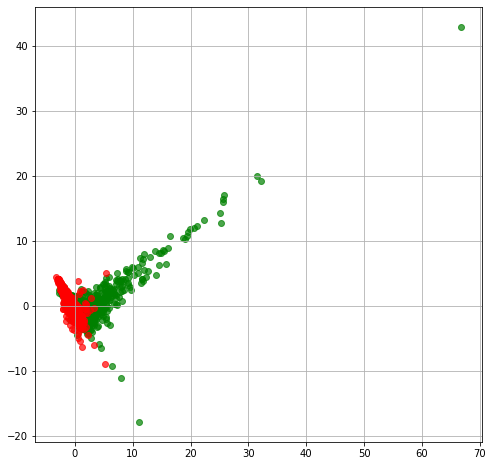

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

def draw_pca(data):
    # PCA analysis only on bool, int64 and float64
    X_raw = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
    sc = StandardScaler()
    sc.fit(X_raw)
    
    X = sc.transform(X_raw)    
    y = data['label']

    fig = plt.figure(1, figsize=(8, 8))
    ax = fig.add_subplot(1,1,1)

    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)

    for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
        ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

    ax.grid()
    plt.show()
    
draw_pca(twibot20_train)

### Random forest model

In [19]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

# PCA analysis only on bool, int64 and float64
X_train = twibot20_train.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_train = twibot20_train['label']

X_test = twibot20_test.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_test = twibot20_test['label']

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8081149619611158


In [20]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

verified                        0.199098
followers_friends_ratio         0.100166
followers_count                 0.070472
listed_growth_rate              0.067666
followers_growth_rate           0.062047
listed_count                    0.059813
user_age                        0.047526
friends_count                   0.045270
friends_growth_rate             0.044837
statuses_count                  0.043679
tweet_freq                      0.041974
description_length              0.040122
favourites_growth_rate          0.039555
favourites_count                0.038101
name_length                     0.030693
screen_name_length              0.023769
num_digits_in_screen_name       0.012641
geo_enabled                     0.007491
has_url                         0.007459
default_profile                 0.005424
profile_background_tile         0.004290
profile_use_background_image    0.003294
num_digits_in_name              0.002934
default_profile_image           0.001679
has_location    

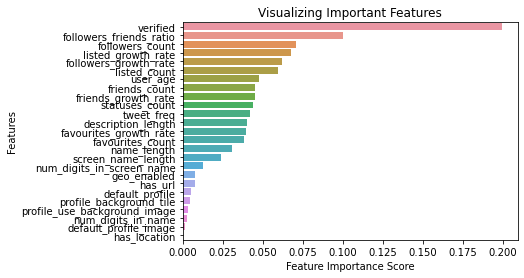

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Cresci-2017 dataset
## Loading the dataset

In [22]:
from datasets import load_cresci17
cresci17 = load_cresci17()
cresci17.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,utc_offset,is_translator,follow_request_sent,protected,notifications,contributors_enabled,following,test_set_1,test_set_2,label
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,5015.000000,1.0,0.0,78.0,0.0,0.0,0.0,4465.000000,3938.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,-5901.954138,1.0,NaN,1.0,NaN,NaN,NaN,0.445913,0.242255,0.684669
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,18906.166175,NaN,NaN,0.0,NaN,NaN,NaN,0.497122,0.428502,0.464669
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-39600.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,-18000.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,-14400.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,1.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,10800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,0.000000,1.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,46800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [23]:
from datasets import remove_cresci17_extra_columns

cresci17 = feature_engineering(remove_useless_api_columns(remove_cresci17_extra_columns(cresci17)))
cresci17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 1502026416 to 2438666143
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          11017 non-null  object             
 1   screen_name                   11017 non-null  object             
 2   statuses_count                11017 non-null  int64              
 3   followers_count               11017 non-null  int64              
 4   friends_count                 11017 non-null  int64              
 5   favourites_count              11017 non-null  int64              
 6   listed_count                  11017 non-null  int64              
 7   default_profile               11017 non-null  bool               
 8   default_profile_image         11017 non-null  bool               
 9   geo_enabled                   11017 non-null  bool               
 10  profile_use_backgrou

## PCA analysis

In [24]:
cresci17.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,label,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,name_length,screen_name_length,description_length,num_digits_in_name,num_digits_in_screen_name
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,0.684669,1491.791323,5.146125,0.621558,0.409965,1.206726,0.007633,2.294207,12.369338,11.800490,46.488064,0.027866,0.367341
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.464669,849.105707,17.303093,12.122728,1.450105,5.621145,0.117342,57.977597,4.142765,2.238532,52.232170,0.356551,1.036392
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,0.000000,749.000000,0.057333,0.008011,0.053333,0.000000,0.000000,0.136364,10.000000,10.000000,0.000000,0.000000,0.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,1.000000,1341.000000,0.095491,0.087825,0.117128,0.000000,0.000474,0.437781,13.000000,12.000000,26.000000,0.000000,0.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,1.000000,2299.000000,3.228526,0.280913,0.312423,0.134565,0.003132,1.062753,15.000000,14.000000,96.000000,0.000000,0.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.000000,3340.000000,563.360269,1163.583431,82.415403,261.699377,9.470245,4794.333333,48.000000,15.000000,298.000000,25.000000,11.000000


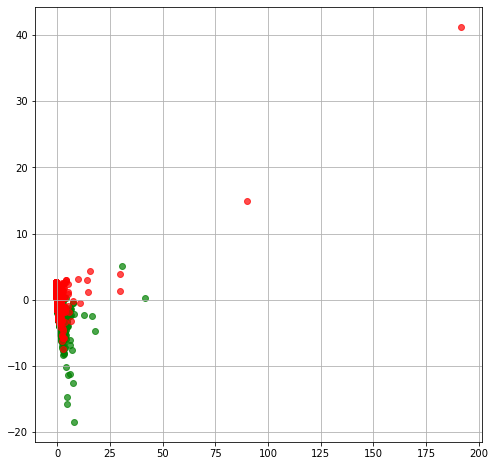

In [25]:
draw_pca(cresci17)

## Random forest model

In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
X = cresci17.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y = cresci17['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

In [27]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9848734873487349


In [28]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

favourites_count                0.326008
favourites_growth_rate          0.230722
tweet_freq                      0.118611
statuses_count                  0.099816
geo_enabled                     0.038357
followers_friends_ratio         0.027330
followers_growth_rate           0.025802
friends_count                   0.025800
user_age                        0.020525
followers_count                 0.017065
description_length              0.014429
friends_growth_rate             0.014428
name_length                     0.008720
listed_growth_rate              0.007777
default_profile                 0.006421
listed_count                    0.004834
screen_name_length              0.003674
has_url                         0.003036
has_location                    0.002395
profile_background_tile         0.001465
num_digits_in_screen_name       0.001390
profile_use_background_image    0.001073
default_profile_image           0.000143
num_digits_in_name              0.000137
verified        

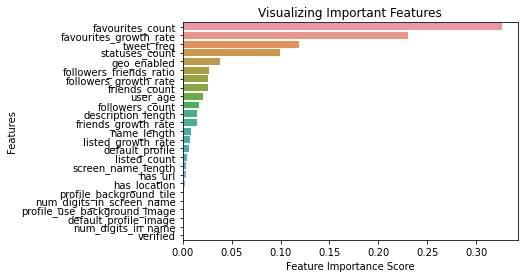

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [30]:
X_test['verified'].value_counts()

False    3634
True        2
Name: verified, dtype: int64

# Midterm-2018 dataset

In [33]:
from datasets import load_midterm18
midterm18 = load_midterm18()
midterm18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   probe_date                    50538 non-null  datetime64[ns, UTC]
 1   screen_name                   50538 non-null  object             
 2   name                          50538 non-null  object             
 3   description                   50538 non-null  object             
 4   created_at                    50538 non-null  datetime64[ns, UTC]
 5   url                           7473 non-null   object             
 6   lang                          50538 non-null  object             
 7   protected                     46995 non-null  float64            
 8   verified                      50538 non-null  bool               
 9   geo_enabled                   50538 non-null  bool               
 10  profile_use

In [35]:
midterm18.sample(3)

,probe_date,screen_name,name,description,created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,label
id,,,,,,,,,,,,,,,,,,,
979570100088041472,2018-10-15 20:48:14+00:00,jasmine48857336,jasmine schmidt,,2018-03-30 04:04:46+00:00,None,en,0.0,False,False,True,True,0,0,0,0,3,1051937816614187008,1
1056589905046863872,2018-11-01 02:04:05+00:00,romaboydstun9,roma boydstun,,2018-10-28 16:53:58+00:00,None,en,0.0,False,False,True,True,0,0,0,0,2,1057815510031761408,1
1052093256601874432,2018-10-16 07:14:52+00:00,RlxdfaQRUi1u7g6,خالدي عبدالرحمن,,2018-10-16 07:05:54+00:00,None,en,0.0,False,False,True,True,0,0,0,0,4,1052095514228023301,1


In [41]:
feature_engineering(remove_useless_api_columns(midterm18)).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   probe_date                    50538 non-null  datetime64[ns, UTC]
 1   screen_name                   50538 non-null  object             
 2   name                          50538 non-null  object             
 3   description                   50538 non-null  object             
 4   created_at                    50538 non-null  datetime64[ns, UTC]
 5   url                           7473 non-null   object             
 6   verified                      50538 non-null  bool               
 7   geo_enabled                   50538 non-null  bool               
 8   profile_use_background_image  50538 non-null  bool               
 9   default_profile               50538 non-null  bool               
 10  followers_c

# Random code

In [31]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

Y_train = train_features['label']
X_train = train_features.drop(['label'], axis=1)

Y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)
# Split dataset into training set and test set

X_test.info()

NameError: name 'train_features' is not defined

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values,Y_train.values)

y_pred=clf.predict(X_test.values)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
profiles = [profile for profile in train_raw_data[train_raw_data["label"] == 0].sample(n=30)["profile"]]
for profile in profiles:
    print("https://twitter.com/"+str(profile['screen_name'])+"\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")

ax.set_xlim3d(-10,20)
ax.set_zlim3d(-10,10)

fig.add_axes(ax)

plt.show()

In [ ]:
%matplotlib notebook

import pandas as pd
import numpy as np

files_genuine = ["../cresci-2017.csv/genuine_accounts.csv/users.csv"]
files_bots = ["../cresci-2017.csv/traditional_spambots_1.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_2.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_3.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_4.csv/users.csv",
              "../cresci-2017.csv/social_spambots_1.csv/users.csv",
              "../cresci-2017.csv/social_spambots_2.csv/users.csv",
              "../cresci-2017.csv/social_spambots_3.csv/users.csv"]

train_raw_data_genuine = pd.concat((pd.read_csv(f) for f in files_genuine))
train_raw_data_genuine['label'] = 0

train_raw_data_bots = pd.concat((pd.read_csv(f) for f in files_bots))
train_raw_data_bots['label'] = 1

train_raw_data = pd.concat((train_raw_data_genuine, train_raw_data_bots))
train_raw_data = train_raw_data.rename(columns={})

train_profile = train_raw_data

train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

train_profile.set_index('id', inplace=True)

#Douteux
#train_profile = train_profile.replace([0], 1)

def date_converter(dt):
    try:
        return pd.to_datetime(dt)
    except:
        return pd.to_datetime("1185440851000", unit="ms", utc=True)

train_profile.created_at = train_profile.created_at.apply(date_converter)

train_labels = train_raw_data["label"].values
train_dict = {"statuses_count":train_profile.statuses_count, 
                "followers_count":train_profile.followers_count, 
                "friends_count":train_profile.friends_count, 
                "favourites_count":train_profile.favourites_count, 
                "listed_count":train_profile.listed_count, 
                "default_profile":train_profile.default_profile,
                "profile_use_background_image":train_profile.profile_use_background_image,
                "verified":train_profile.verified,
                "user_age":(pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days,
                "tweet_freq": np.nan_to_num(train_profile.statuses_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_growth_rate": np.nan_to_num(train_profile.followers_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "friends_growth_rate" : np.nan_to_num(train_profile.friends_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "favourites_growth_rate" : np.nan_to_num(train_profile.favourites_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "listed_growth_rate" : np.nan_to_num(train_profile.listed_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_friends_ratio" : np.nan_to_num(train_profile.followers_count / train_profile.friends_count, posinf=0.0),
                "screen_name_length": train_profile.screen_name.str.len(),
                "num_digits_in_screen_name": train_profile.screen_name.str.count('\d'),
                "name_length": train_profile.name.str.len(),
                "num_digits_in_name": train_profile.name.str.count('\d'),
                "description_length": train_profile.description.str.len(),
                 "label":train_labels
               }
train_features2 = pd.DataFrame(data=train_dict)
train_features2 = train_features2.replace({'True ': True, 'False ': False})
train_features2 = train_features2.fillna(0)
train_features2.default_profile = train_features2.default_profile.astype(bool)
train_features2.verified = train_features2.verified.astype(bool)
train_features2.profile_use_background_image = train_features2.profile_use_background_image.astype(bool)

train_features2.describe()

In [ ]:
train_profile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label', 'verified'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")


fig.add_axes(ax)
ax.set_xlim3d(0,50)
ax.set_ylim3d(-10,30)
ax.set_zlim3d(-10,10)


plt.show()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = train_features2['label']
X = train_features2.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
indexes = X_test[y_pred == 1].index
profiles = test_profile.loc[test_profile.index.isin(indexes)]
for i, profile in profiles.iterrows():
    print("https://twitter.com/"+profile.screen_name+"\n")

In [ ]:
profiles.values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [421]:
%matplotlib notebook

import pandas as pd
import numpy as np

file_users = "../midterm-2018_processed_user_objects.json"
file_bots = "../midterm-2018.tsv"

midterm2018_profile = pd.read_json(file_users)
midterm2018_labels = pd.read_csv(file_bots, names=['id', 'label'], sep='\t')

midterm2018_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = midterm2018_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

midterm2018_profile = midterm2018_profile.rename(columns={'user_id': 'id'})

midterm2018_profile.set_index('id', inplace=True)
midterm2018_labels.set_index('id', inplace=True)

def date_converter(dt):
    try:
        return pd.to_datetime(dt)
    except:
        return pd.to_datetime("1185440851000", unit="ms")

midterm2018_profile.probe_timestamp = midterm2018_profile.probe_timestamp.apply(date_converter)
midterm2018_labels.label = midterm2018_labels.label.apply(lambda l: 1 if l == 'bot' else 0)

In [422]:
midterm2018_dict = {"statuses_count":midterm2018_profile.statuses_count, 
                "followers_count":midterm2018_profile.followers_count, 
                "friends_count":midterm2018_profile.friends_count, 
                "favourites_count":midterm2018_profile.favourites_count, 
                "listed_count":midterm2018_profile.listed_count, 
                "default_profile":midterm2018_profile.default_profile,
                "profile_use_background_image":midterm2018_profile.profile_use_background_image,
                "verified":midterm2018_profile.verified,
                "user_age":(pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days,
                "tweet_freq": np.nan_to_num(midterm2018_profile.statuses_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "followers_growth_rate": np.nan_to_num(midterm2018_profile.followers_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "friends_growth_rate" : np.nan_to_num(midterm2018_profile.friends_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "favourites_growth_rate" : np.nan_to_num(midterm2018_profile.favourites_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "listed_growth_rate" : np.nan_to_num(midterm2018_profile.listed_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "followers_friends_ratio" : np.nan_to_num(midterm2018_profile.followers_count / midterm2018_profile.friends_count, posinf=0.0),
                "screen_name_length": midterm2018_profile.screen_name.str.len(),
                "num_digits_in_screen_name": midterm2018_profile.screen_name.str.count('\d'),
                "name_length": midterm2018_profile.name.str.len(),
                "num_digits_in_name": midterm2018_profile.name.str.count('\d'),
                "description_length": midterm2018_profile.description.str.len(),
               }

midterm2018_features = pd.DataFrame(data=midterm2018_dict)
midterm2018_features = pd.concat([midterm2018_features, midterm2018_labels], axis=1)
midterm2018_features = midterm2018_features.fillna(0)

midterm2018_features.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
count,50538.000000,5.053800e+04,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000
mean,2450.863944,2.646619e+03,291.848649,2314.836855,15.767264,408.964245,15.351099,4.507144,12.847318,9.774962,0.020671,3.802432,12.823281,3.274447,11.064427,0.239463,34.613697,0.839883
std,13770.228640,2.322714e+05,2671.673946,12672.635307,449.017746,947.806672,51.733556,74.937591,66.552859,49.899398,0.209413,181.025669,2.455673,3.347128,5.351100,1.300856,50.807892,0.366718
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,7.000000,0.000000,0.000000,1.000000
50%,30.000000,1.000000e+00,9.000000,0.000000,0.000000,2.000000,0.545476,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,2.000000,11.000000,0.000000,0.000000,1.000000
75%,147.000000,1.600000e+01,141.000000,75.000000,0.000000,188.000000,8.333333,0.222222,0.719968,1.445764,0.000000,0.189262,15.000000,8.000000,14.000000,0.000000,57.000000,1.000000
max,599307.000000,5.086590e+07,298234.000000,463821.000000,67930.000000,4342.000000,2461.000000,13520.972355,2236.000000,1829.000000,18.056885,26997.250000,15.000000,14.000000,50.000000,47.000000,197.000000,1.000000


In [423]:
midterm2018_features.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
4107317134,67025,481,870,6542,26,False,False,False,1098,61.042805,...,0.792350,5.958106,0.023679,0.552874,13,2,8,0,144.0,0
4858296837,158,202,712,1515,5,False,False,False,1012,0.156126,...,0.703557,1.497036,0.004941,0.283708,12,0,17,0,104.0,0
232631847,4029,278,342,4780,4,True,True,False,2867,1.405302,...,0.119288,1.667248,0.001395,0.812865,10,0,6,0,146.0,0
16700555,53427,29546,384,143163,402,False,True,True,3677,14.530052,...,0.104433,38.934729,0.109328,76.942708,11,0,12,0,157.0,0
334443152,1315,95,668,1178,1,True,True,False,2673,0.491957,...,0.249906,0.440703,0.000374,0.142216,8,4,1,0,0.0,0


<IPython.core.display.Javascript object>


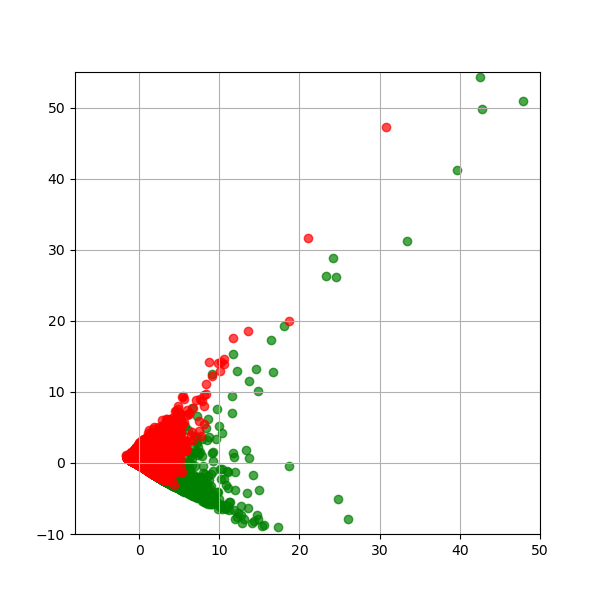

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = midterm2018_features.drop(['label', 'verified'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = midterm2018_features['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.xlim(-8, 50)
plt.ylim(-10,55)
plt.show()

In [431]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = midterm2018_features['label']
X = midterm2018_features.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16678 entries, 1053466183326949376 to 1047230030152171520
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                16678 non-null  int64  
 1   followers_count               16678 non-null  int64  
 2   friends_count                 16678 non-null  int64  
 3   favourites_count              16678 non-null  int64  
 4   listed_count                  16678 non-null  int64  
 5   default_profile               16678 non-null  bool   
 6   profile_use_background_image  16678 non-null  bool   
 7   verified                      16678 non-null  bool   
 8   user_age                      16678 non-null  int64  
 9   tweet_freq                    16678 non-null  float64
 10  followers_growth_rate         16678 non-null  float64
 11  friends_growth_rate           16678 non-null  float64
 12  favourites_growth_rate      

In [432]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.9934044849502338


user_age                        0.296640
favourites_count                0.135184
statuses_count                  0.119307
listed_growth_rate              0.088541
listed_count                    0.076459
followers_count                 0.062790
default_profile                 0.043166
followers_friends_ratio         0.039266
favourites_growth_rate          0.029766
followers_growth_rate           0.028469
friends_growth_rate             0.023900
tweet_freq                      0.020747
friends_count                   0.015459
description_length              0.007242
num_digits_in_screen_name       0.004325
screen_name_length              0.003392
name_length                     0.003361
profile_use_background_image    0.001275
num_digits_in_name              0.000627
verified                        0.000084
dtype: float64

In [440]:
y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.4885883347421809


favourites_count                0.353044
favourites_growth_rate          0.250768
tweet_freq                      0.099728
statuses_count                  0.086597
followers_count                 0.031619
friends_count                   0.030293
followers_growth_rate           0.028127
followers_friends_ratio         0.024978
user_age                        0.023411
friends_growth_rate             0.016031
description_length              0.015853
listed_growth_rate              0.010512
name_length                     0.008348
default_profile                 0.005886
listed_count                    0.005715
screen_name_length              0.005131
profile_use_background_image    0.002216
num_digits_in_screen_name       0.001503
num_digits_in_name              0.000163
verified                        0.000076
dtype: float64

In [466]:
train_features2

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
1502026416,2177,208,332,265,1,False,False,False,1008,2.159722,...,0.329365,0.262897,0.000992,0.626506,8,4,15.0,0.0,21.0,0
2492782375,2660,330,485,3972,5,True,True,False,672,3.958333,...,0.721726,5.910714,0.007440,0.680412,8,4,5.0,0.0,48.0,0
293212315,1254,166,177,1185,0,False,True,False,1776,0.706081,...,0.099662,0.667230,0.000000,0.937853,9,2,8.0,0.0,34.0,0
191839658,202968,2248,981,60304,101,False,True,False,2006,101.180459,...,0.489033,30.061815,0.050349,2.291539,11,0,17.0,0.0,58.0,0
3020965143,82,21,79,5,0,True,True,False,403,0.203474,...,0.196030,0.012407,0.000000,0.265823,15,8,8.0,0.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396095423,106,4,23,0,0,False,True,False,728,0.145604,...,0.031593,0.000000,0.000000,0.173913,14,0,16.0,0.0,142.0,1
2396099064,173,2,20,0,0,False,True,False,728,0.237637,...,0.027473,0.000000,0.000000,0.100000,13,0,15.0,0.0,142.0,1
2429375022,137,29,124,0,0,False,True,False,709,0.193230,...,0.174894,0.000000,0.000000,0.233871,15,0,17.0,0.0,142.0,1


In [467]:
midterm2018_features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
4107317134,67025,481,870,6542,26,False,False,False,1098,61.042805,...,0.792350,5.958106,0.023679,0.552874,13,2,8,0,144.0,0
4858296837,158,202,712,1515,5,False,False,False,1012,0.156126,...,0.703557,1.497036,0.004941,0.283708,12,0,17,0,104.0,0
232631847,4029,278,342,4780,4,True,True,False,2867,1.405302,...,0.119288,1.667248,0.001395,0.812865,10,0,6,0,146.0,0
16700555,53427,29546,384,143163,402,False,True,True,3677,14.530052,...,0.104433,38.934729,0.109328,76.942708,11,0,12,0,157.0,0
334443152,1315,95,668,1178,1,True,True,False,2673,0.491957,...,0.249906,0.440703,0.000374,0.142216,8,4,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078921538739544064,5,0,4,3,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,13,1,12,0,57.0,1
1078923723019874304,280,0,0,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,15,8,10,0,42.0,1
1078937076878503936,1,0,0,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,15,8,10,0,130.0,1


In [469]:
midterm2018_cresci17_features = pd.concat([midterm2018_features.sample(n = 10000), train_features2.sample(n = 10000)])
midterm2018_cresci17_features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
430956476,7744,1778,1110,8841,58,False,True,False,2526,3.065717,...,0.439430,3.500000,0.022961,1.601802,9,0,16.0,0.0,153.0,0
1056289109122170881,204,1,64,1,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.015625,14,0,12.0,0.0,112.0,1
1059673974626500609,8,0,1,5,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,9,2,14.0,0.0,28.0,1
1057074808284835840,298,3,499,107,0,True,True,False,4,74.500000,...,124.750000,26.750000,0.000000,0.006012,8,0,15.0,0.0,0.0,1
1056784994310340608,77,0,0,0,0,True,True,False,1,77.000000,...,0.000000,0.000000,0.000000,0.000000,12,8,4.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355165697,71,10,42,0,0,False,True,False,752,0.094415,...,0.055851,0.000000,0.000000,0.238095,14,0,15.0,0.0,0.0,1
1552229736,6576,535,289,24072,0,False,True,False,991,6.635721,...,0.291625,24.290616,0.000000,1.851211,13,0,13.0,0.0,0.0,0
2542039813,19672,944,338,14143,18,True,True,False,651,30.218126,...,0.519201,21.725038,0.027650,2.792899,11,0,4.0,0.0,45.0,0


In [512]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = midterm2018_cresci17_features['label']
X = midterm2018_cresci17_features.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 994242593822195713 to 2349927392
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                6600 non-null   int64  
 1   followers_count               6600 non-null   int64  
 2   friends_count                 6600 non-null   int64  
 3   favourites_count              6600 non-null   int64  
 4   listed_count                  6600 non-null   int64  
 5   default_profile               6600 non-null   bool   
 6   profile_use_background_image  6600 non-null   bool   
 7   verified                      6600 non-null   bool   
 8   user_age                      6600 non-null   int64  
 9   tweet_freq                    6600 non-null   float64
 10  followers_growth_rate         6600 non-null   float64
 11  friends_growth_rate           6600 non-null   float64
 12  favourites_growth_rate        6600 non-

In [513]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.9871212121212121


favourites_count                0.221501
favourites_growth_rate          0.186539
statuses_count                  0.178243
user_age                        0.098732
followers_count                 0.056657
followers_friends_ratio         0.050269
tweet_freq                      0.046021
friends_growth_rate             0.037787
followers_growth_rate           0.035005
friends_count                   0.031659
listed_growth_rate              0.015787
description_length              0.010265
listed_count                    0.008697
default_profile                 0.006060
screen_name_length              0.006043
num_digits_in_screen_name       0.004749
name_length                     0.004063
profile_use_background_image    0.001248
num_digits_in_name              0.000586
verified                        0.000089
dtype: float64

In [515]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9653030303030303


In [518]:
y_test = train_features2['label']
X_test = train_features2.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9534355995280022


In [479]:
indexes = X_test[y_pred == 1].index
profiles = train_profile.loc[test_profile.index.isin(indexes)]
for i, profile in profiles.iterrows():
    print("https://twitter.com/"+profile.screen_name+"\n")

SyntaxError: expected ':' (1081637686.py, line 3)

In [507]:
indexes = X_test[y_pred == 1].index
profiles = train_profile.loc[test_profile.index.isin(indexes)]

IndexError: Boolean index has wrong length: 1183 instead of 8278

In [519]:
midterm2018_features[midterm2018_features.statuses_count < 5]

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
461721394,1,7,59,0,0,False,False,False,2490,0.000402,...,0.023695,0.000000,0.0,0.118644,14,0,16,0,160.0,0
1055128634837606400,3,0,16,4,0,True,True,False,13,0.230769,...,1.230769,0.307692,0.0,0.000000,13,0,13,0,0.0,0
1053620709245755392,1,0,7,0,0,True,True,False,17,0.058824,...,0.411765,0.000000,0.0,0.000000,14,3,24,3,0.0,0
1059623586263121922,1,0,1,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.000000,9,0,9,0,0.0,0
1044631651286953986,1,1,1,1,0,True,True,False,42,0.023810,...,0.023810,0.023810,0.0,1.000000,7,0,12,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078765951519203330,1,0,12,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.000000,13,8,5,0,0.0,1
1078826866579042311,3,1,10,6,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.100000,14,8,6,0,121.0,1
1078864793438744576,3,0,6,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.000000,15,3,13,0,126.0,1
